#**Nama : Gavrilla Claudia**

In [2]:
#Import library - library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [3]:
#Import dataset
df = pd.read_csv("/content/GA_180123.csv")

In [4]:
#Menampilkan 5 baris data teratas
df.head()

,Page Title,Page,articleid,contenttype,Source / Medium,Users,Pageviews,Pages / Session,Avg. Session Duration,Avg. Time on Page,New Users
0,Gempa Keras Guncang Jakarta,m.detik.com/news/berita/d-3829115/gempa-keras-...,3829115,singlepagenews,google / organic,99099.0,127793.0,1.546663,113.012962,93.089694,18666.0
1,"Video: dr Michael Triangto, Dokter 'Lapangan' ...",m.detik.com/health/read/2018/01/18/124423/3821...,3821182,singlepagenews,banner / apps,66409.0,110322.0,1.651700,14.790801,2.804197,59502.0
2,Gempa Keras Guncang Jakarta,m.detik.com/news/berita/d-3829115/gempa-keras-...,3829115,singlepagenews,(direct) / (none),64686.0,79376.0,1.394323,90.728763,43.394609,25789.0
3,Gempa Keras Guncang Jakarta,m.detik.com/news/berita/d-3829115/gempa-keras-...,3829115,singlepagenews,googleapis.com / referral,49821.0,65072.0,1.386458,137.591554,23.242243,12374.0
4,Gempa Keras Guncang Jakarta,news.detik.com/berita/d-3829115/gempa-keras-gu...,3829115,singlepagenews,google / organic,39147.0,46828.0,1.370963,145.927336,205.678242,9375.0


In [5]:
#Melihat dimensi (jumlah baris dan kolom) dalam dataframe
df.shape

(21390, 11)

In [6]:
#Melihat tipe data dari setiap kolom dalam dataframe
df.dtypes

Page Title                object
Page                      object
articleid                 object
contenttype               object
Source / Medium           object
Users                    float64
Pageviews                float64
Pages / Session          float64
Avg. Session Duration    float64
Avg. Time on Page        float64
New Users                float64
dtype: object

In [7]:
#Melihat informasi lebih rinci dari dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21390 entries, 0 to 21389
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Page Title             21390 non-null  object 
 1   Page                   21390 non-null  object 
 2   articleid              21389 non-null  object 
 3   contenttype            21389 non-null  object 
 4   Source / Medium        21389 non-null  object 
 5   Users                  21389 non-null  float64
 6   Pageviews              21389 non-null  float64
 7   Pages / Session        21389 non-null  float64
 8   Avg. Session Duration  21389 non-null  float64
 9   Avg. Time on Page      21389 non-null  float64
 10  New Users              21389 non-null  float64
dtypes: float64(6), object(5)
memory usage: 1.8+ MB


#**Preprocessing**

In [8]:
#Mengecek jumlah nilai NULL pada tiap kolom suatu data
df.isna().sum(axis=0)

Page Title               0
Page                     0
articleid                1
contenttype              1
Source / Medium          1
Users                    1
Pageviews                1
Pages / Session          1
Avg. Session Duration    1
Avg. Time on Page        1
New Users                1
dtype: int64

**Karena ada beberapa kolom dalam dataframe "df"yang memiliki nilai yang tidak lengkap atau ada nilai null sehingga dilanjutkan untuk menangani kondisi nilai null tersebut dengan menghapus baris dan kolom yang mengandung nilai null.**

In [9]:
# Menghapus baris dan kolom yang mengandung nilai null
df.dropna(axis=0, inplace=True)
df.dropna(axis=1, inplace=True)

In [11]:
#Mengecek kembali jumlah nilai NULL pada tiap kolom suatu data
df.isna().sum(axis=0)

Page Title               0
Page                     0
articleid                0
contenttype              0
Source / Medium          0
Users                    0
Pageviews                0
Pages / Session          0
Avg. Session Duration    0
Avg. Time on Page        0
New Users                0
dtype: int64

**Karena tidak ada kolom dalam dataframe "df" yang memiliki nilai null sehingga dilanjutkan ke tahap selanjutnya yakni tahap analisis dan interpretasi hasil.**

#**Analisis dan Interpretasi Hasil**

#**Analisis preferensi pengguna terhadap jenis konten tertentu.**

Jumlah Pageviews berdasarkan contenttype (5 teratas):
contenttype
singlepagenews       6349224.0
multiplefotophoto    4180503.0
multiplepagenews      176708.0
news                   17646.0
longstorynews          10539.0
Name: Pageviews, dtype: float64


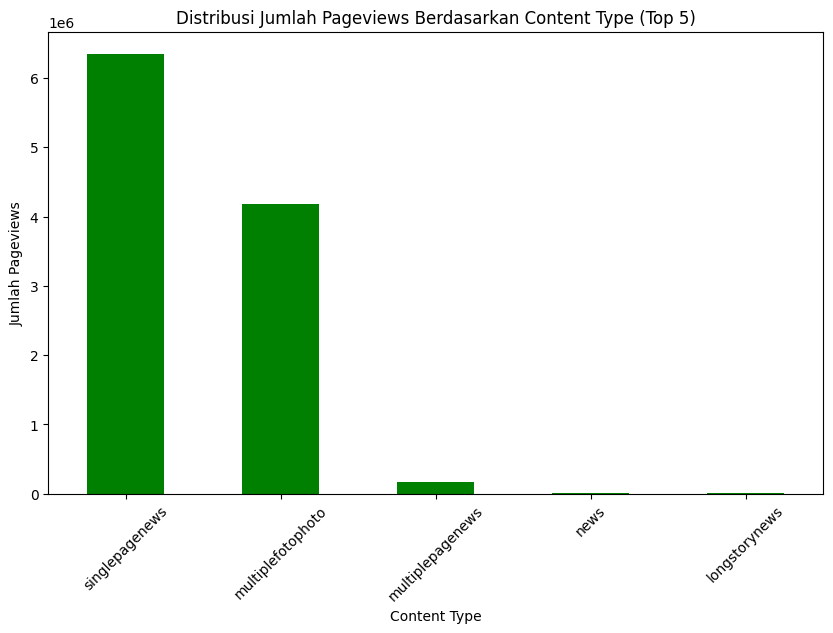

In [12]:
# Menghitung jumlah Pageviews berdasarkan contenttype
pageviews_by_contenttype = df.groupby('contenttype')['Pageviews'].sum().nlargest(5)

# Menampilkan hasil perhitungan
print("Jumlah Pageviews berdasarkan contenttype (5 teratas):")
print(pageviews_by_contenttype)

# Visualisasi distribusi jumlah Pageviews berdasarkan contenttype
plt.figure(figsize=(10, 6))
pageviews_by_contenttype.plot(kind='bar', color='green')
plt.title('Distribusi Jumlah Pageviews Berdasarkan Content Type (Top 5)')
plt.xlabel('Content Type')
plt.ylabel('Jumlah Pageviews')
plt.xticks(rotation=45)
plt.show()

**Analisis : Dari diagram batang di atas, dapat dilihat bahwa content type "Singlepagenews" memiliki jumlah pageviews yang paling tinggi yakni 6.349.224. Artinya pengguna memiliki tingkat minat atau relevansi yang sangat tinggi untuk mengunjungi halaman tersebut.**

**Interpretasi : Dari hasil analisis tersebut, dapat disimpulkan bahwa "singlepagenews" menjadi jenis konten yang paling sering dikunjungi oleh pengguna. Artinya pengguna lebih suka membaca sebuah artikel atau berita yang disajikan dalam satu halaman tunggal, sehingga pengguna tidak perlu melakukan navigasi ke halaman lain untuk membaca seluruh kontennya.**

#**Analisis performa artikel berdasarkan judul**

Performa artikel berdasarkan judul (Page Title):
Bikin Lambe Turah Diomelin, Nih Si Seksi yang Lengket-lengket sama Gading    310
Kerennya Foto Editan Para Master Photoshop                                   294
Meme-Meme Kocak dari Transfer Sanchez-Mkhitaryan                             246
Messi Berjaket Go-Jek, Isyana Kini Jadi 'Korban' Dede Sunandar               202
Karya Memukau Jawara Kontes Foto Warna Alam                                  187
                                                                            ... 
Warga Cirebon Temukan Bayi Lucu Ini di Tempat Sampah                           1
5 Pertanyaan yang Membuat HRD Terkesan Saat Wawancara Kerja                    1
Ada 295 Titik Rawan Gempa di RI                                                1
Berapa Modal Awal Buka Usaha Laundry?                                          1
Beli iPhone X di Luar Negeri, Ini Pajak yang Harus Dibayar                     1
Name: Page Title, Length: 2451, dtype: int64


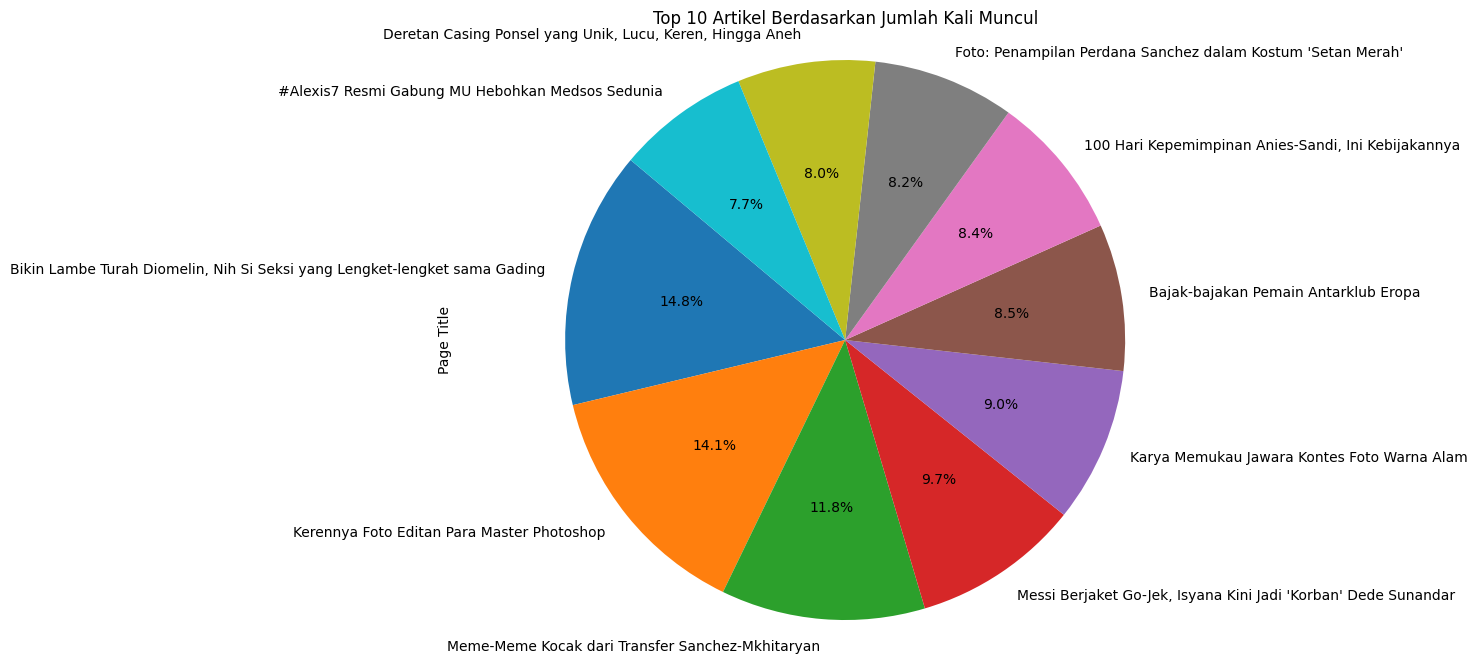

In [13]:
# Menganalisis performa artikel berdasarkan judul (Page Title)
performa_artikel = df['Page Title'].value_counts()

# Menampilkan hasil analisis performa artikel berdasarkan judul
print("Performa artikel berdasarkan judul (Page Title):")
print(performa_artikel)

# Membuat visualisasi dalam bentuk diagram lingkaran
plt.figure(figsize=(10, 8))
performa_artikel.head(10).plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Artikel Berdasarkan Jumlah Kali Muncul')
plt.axis('equal')
plt.show()

**Analisis : Dari diagram batang di atas, dapat dilihat bahwa artikel dengan Page Title "Bikin Lambe Turah Diomelin, Nih Si Seksi yang Lengket-lengket sama Gading" sebesar 14.8%. Kemudian artikel dengan Page Title "Kerennya Foto Editan Para Master Photoshop" sebesar 14.1%. Ini menunjukkan bahwa kedua artikel ini populer di antara pengguna.**

**Interpretasi : Dari hasil analisis tersebut, dapat disimpulkan bahwa artikel - artikel yang bersifat hiburan atau berita ringan yang biasanya lebih bersifat humoris atau menghibur lebih dimintati oleh pengguna daripada memberikan informasi serius. Selain itu, judul-judul artikel tersebut juga cenderung menarik perhatian dan menggelitik imajinasi pembaca atau pengguna.**

#**Analisis Pencarian (Organic Search vs Referral Search)**

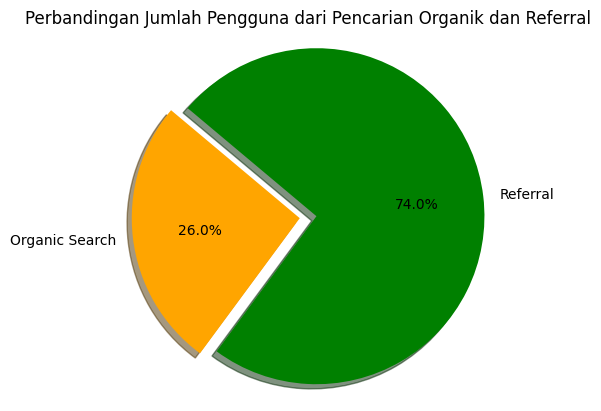

In [14]:
# Mengelompokkan data berdasarkan sumber trafik
traffic_source_grouped = df.groupby('Source / Medium').size()

# Memisahkan data sumber trafik menjadi dua kelompok: pencarian organik dan referral
organic_search = df[df['Source / Medium'].str.contains('organic', case=False)]
referral = df[df['Source / Medium'].str.contains('referral', case=False)]

# Menghitung jumlah pengguna dari pencarian organik dan referral
organic_search_users = organic_search['Users'].sum()
referral_users = referral['Users'].sum()

# Visualisasi perbandingan jumlah pengguna dari pencarian organik dan referral
labels = ['Organic Search', 'Referral']
sizes = [organic_search_users, referral_users]
colors = ['orange', 'green']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Perbandingan Jumlah Pengguna dari Pencarian Organik dan Referral')
plt.show()


**Analisis : Dari diagram lingkaran di atas, dapat dilihat bahwa pencarian refferal lebih tinggi sebesar 74% daripada pencarian organik (organic search) yang hanya sebesar 26%.**

**Interpretasi : Dari hasil analisis tersebut, dapat disimpulkan bahwa pengguna lebih cenderung mengikuti tautan yang direkomendasikan oleh situs lain atau melalui media sosial, daripada melakukan pencarian aktif sendiri di mesin pencari seperti Google, Bing, Yahoo. Artinya pengguna lebih responsif terhadap rekomendasi atau tautan yang diberikan oleh sumber luar.**

#**Analisis Durasi dan Waktu Rata-rata Penggunaan**

In [15]:
# Menghitung rata-rata Avg. Session Duration dan Avg. Time on Page
avg_session_duration = df['Avg. Session Duration'].mean()
avg_time_on_page = df['Avg. Time on Page'].mean()

print(f"Rata-rata Avg. Session Duration: {avg_session_duration} seconds")
print(f"Rata-rata Avg. Time on Page: {avg_time_on_page} seconds")

Rata-rata Avg. Session Duration: 327.2269127492043 seconds
Rata-rata Avg. Time on Page: 86.03891340199154 seconds


**Analisis : Dari hasil di atas, Rata-rata Avg. Session Duration sebesar 327.22 detik menunjukkan bahwa pengguna cenderung bertahan dalam sesi mereka selama kurang lebih 6 menit. Kemudian, Rata-rata Avg. Time on Page sebesar 86.03 detik menunjukkan bahwa pengguna cenderung menghabiskan waktu sekitar 1 menit 43 detik di halaman tersebut sebelum berpindah ke halaman lain atau meninggalkan situs.**

**Interpretasi : Dari hasil analisis tersebut, dapat disimpulkan bahwa isi konten sangat berpengaruh tehadap lama-tidaknya pengguna berada pada halaman artikel/berita tersebut. Konten yang menarik atau informatif dapat menarik perhatian pengguna dan membuat mereka cenderung bertahan untuk tetap membaca artikel tersebut.**

#**Actionable Insight**

Berikut actionable insight yang dapat diterapkan ke depannya berdasarkan hasil analisis dan interpretasi di atas :

1. Fokus pada singlepagenews. Jenis konten "singlepagenews" memiliki jumlah pageviews yang signifikan. Hal ini menunjukkan bahwa pengguna cenderung lebih tertarik pada konten berita yang disajikan dalam satu halaman tanpa perlu navigasi ke halaman lain. Strategi untuk meningkatkan jumlah pageviews dapat difokuskan pada meningkatkan kualitas dan relevansi konten berita dalam format halaman tunggal.

2. Artikel atau berita yang dibuat sebaiknya diawali dengan judul yang menarik perhatian karena cenderung lebih diminati masyarakat. Selain itu, artikel atau berita juga harus memiliki konten atau narasi yang unik, kreatif, dan memiliki daya tarik tersendiri.

3. Pengembangan kerjasama. Strategi pemasaran di platform lain atau kemitraan dengan situs lain perlu ditingkatkan sehingga menarik pengguna ke situs kita, selain itu dapat menjadi peluang untuk saling menguntungkan antar pihak.

4. Meningkatkan kualitas konten. Dengan konten yang menarik, maka peluang untuk meningkatkan retensi pengguna dapat terlaksana. Perbaikan atau penyempurnaan pada halaman-halaman yang kurang menarik perhatian pengguna juga dapat dilakukan untuk meningkatkan tingkat keterlibatan pengguna.